In [1]:
import h2o

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_172"; Java(TM) SE Runtime Environment (build 1.8.0_172-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.172-b11, mixed mode)
  Starting server from /anaconda2/envs/spike_basico/h2o_jar/h2o.jar
  Ice root: /var/folders/3z/5qxln1rj4zjblz0l0hvy0n540000gn/T/tmpb1ve7wlv
  JVM stdout: /var/folders/3z/5qxln1rj4zjblz0l0hvy0n540000gn/T/tmpb1ve7wlv/h2o_maravenag_started_from_python.out
  JVM stderr: /var/folders/3z/5qxln1rj4zjblz0l0hvy0n540000gn/T/tmpb1ve7wlv/h2o_maravenag_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/Santiago
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,6 months and 23 days !!!
H2O cluster name:,H2O_from_python_maravenag_i95zyc
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [7]:
data = h2o.upload_file(path="insurance.csv",destination_frame="insurance")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
data.describe()

Rows:1338
Cols:7




,age,sex,bmi,children,smoker,region,charges
type,int,enum,real,int,enum,enum,real
mins,18.0,,15.96,0.0,,,1121.8739
mean,39.20702541106125,,30.663396860986524,1.0949177877429015,,,13270.422265141255
maxs,64.0,,53.13,5.0,,,63770.42801
sigma,14.049960379216147,,6.098186911679012,1.205492739781914,,,12110.011236693992
zeros,0,,0,574,,,0
missing,0,0,0,0,0,0,0
0,19.0,female,27.9,0.0,yes,southwest,16884.924
1,18.0,male,33.77,1.0,no,southeast,1725.5523
2,28.0,male,33.0,3.0,no,southeast,4449.462


In [9]:
data['sex'] = data['sex'].asfactor()
data['smoker'] = data['smoker'].asfactor()
data['region'] = data['region'].asfactor()

In [14]:
train, test = data.split_frame(ratios=([0.7,]))

In [10]:
data.describe()

Rows:1338
Cols:7




,age,sex,bmi,children,smoker,region,charges
type,int,enum,real,int,enum,enum,real
mins,18.0,,15.96,0.0,,,1121.8739
mean,39.20702541106125,,30.663396860986524,1.0949177877429015,,,13270.422265141255
maxs,64.0,,53.13,5.0,,,63770.42801
sigma,14.049960379216147,,6.098186911679012,1.205492739781914,,,12110.011236693992
zeros,0,,0,574,,,0
missing,0,0,0,0,0,0,0
0,19.0,female,27.9,0.0,yes,southwest,16884.924
1,18.0,male,33.77,1.0,no,southeast,1725.5523
2,28.0,male,33.0,3.0,no,southeast,4449.462


In [11]:
y = "charges"

In [12]:
from h2o.estimators import H2OXGBoostEstimator

In [15]:
param = {
      "ntrees" : 100
    , "max_depth" : 10
    , "learn_rate" : 0.02
    , "sample_rate" : 0.7
    , "col_sample_rate_per_tree" : 0.9
    , "min_rows" : 5
    , "seed": 4241
    , "score_tree_interval": 100
    }

In [25]:
col_names = [x for x in train.col_names if x not in ["charges"]]

In [26]:
col_names

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [27]:
model = H2OXGBoostEstimator(**param)
model.train(x=train.col_names,y=y,training_frame=train,validation_frame=test)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [28]:
test.head()

age,sex,bmi,children,smoker,region,charges
31,female,25.74,0,no,southeast,3756.62
46,female,33.44,1,no,southeast,8240.59
60,female,25.84,0,no,northwest,28923.1
23,male,34.4,0,no,southwest,1826.84
27,male,42.13,0,yes,southeast,39611.8
28,male,36.4,1,yes,southwest,51194.6
19,male,20.425,0,no,northwest,1625.43
26,male,20.8,0,no,southwest,2302.3
37,female,30.8,2,no,southeast,6313.76
18,female,38.665,2,no,northeast,3393.36


In [29]:
import matplotlib.pyplot as plt

In [42]:
predictions = model.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [44]:
preds = predictions.as_data_frame()

In [47]:
preds = preds['predict'].tolist()

In [57]:
real = test.as_data_frame()
real = real['charges'].tolist()

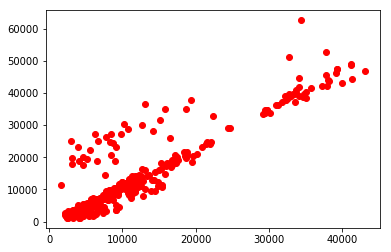

In [58]:
plt.plot(preds,real,'ro')